*************************************************************************************
                           Working Directory
*************************************************************************************

In [1]:
import os#Miscellaneous operating system interfaces
os.chdir(r'C:\\Users\\rtreichl\\Documents\\competitions\\homesite')  #working directory

*************************************************************************************
                               Packages
*************************************************************************************

In [2]:
%matplotlib inline

In [3]:
# import packages for text processing and machine learning
import pandas as pd  # DataFrame structure and operations
import numpy as np  # arrays and numerical processing
import matplotlib.pyplot as plt

#import packages for graphics
from pandas.tools.plotting import scatter_matrix

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import metrics


#Dimensionality Reduction
from sklearn.decomposition import PCA as pca_using_svd

#Ensemble methods
from sklearn.ensemble import RandomForestClassifier  # random forests

#xgboost
import xgboost as xgb #xgboost

*******************************************************************************
                                    Import Data and Preprocessing
*******************************************************************************

In [4]:
# read in comma-delimited text file and create data frame

homesite_df = pd.read_csv("train.csv")
test_df     = pd.read_csv("test.csv")

In [5]:
# date imputation

# Convert Date to Year, Month, and Week
homesite_df['Year']  = homesite_df['Original_Quote_Date'].apply(lambda x: int(str(x)[:4]))
homesite_df['Month'] = homesite_df['Original_Quote_Date'].apply(lambda x: int(str(x)[5:7]))
homesite_df['Week']  = homesite_df['Original_Quote_Date'].apply(lambda x: int(str(x)[8:10]))
homesite_df['dayofweek']=pd.to_datetime(homesite_df['Original_Quote_Date'])
homesite_df['dayofweek']=homesite_df['dayofweek'].dt.dayofweek


test_df['Year']  = test_df['Original_Quote_Date'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Original_Quote_Date'].apply(lambda x: int(str(x)[5:7]))
test_df['Week']  = test_df['Original_Quote_Date'].apply(lambda x: int(str(x)[8:10]))
test_df['dayofweek']=pd.to_datetime(test_df['Original_Quote_Date'])
test_df['dayofweek']=test_df['dayofweek'].dt.dayofweek

In [6]:
# drop quote date as its no longer needed
homesite_df.drop(['Original_Quote_Date'], axis=1,inplace=True)
test_df.drop(['Original_Quote_Date'], axis=1,inplace=True)

In [7]:
#  Encoding categorical features
# creating indicator variables (and leaving 1 out) will prove erroneous given the number of variables and anonimity

for f in homesite_df.columns:
    if homesite_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(homesite_df[f].values) + list(test_df[f].values)))
        homesite_df[f] = lbl.transform(list(homesite_df[f].values))
        test_df[f] = lbl.transform(list(test_df[f].values))

In [8]:
#   -1 defines missing value
#  Imputation of missing values

homesite_df.fillna(-1, inplace=True)
test_df.fillna(-1, inplace=True)

In [9]:
# Variable PropertyField6 and GeographicField10A are all zeros

homesite_df = homesite_df.drop(['PropertyField6'], axis=1)
test_df = test_df.drop(['PropertyField6'], axis=1)
homesite_df = homesite_df.drop(['GeographicField10A'], axis=1)
test_df = test_df.drop(['GeographicField10A'], axis=1)

In [10]:
# create missing value indicator values

#list of variables with missing values
missingdata_list=['CoverageField1A','CoverageField1B','CoverageField11A',
'CoverageField11B','SalesField2A','SalesField2B','PersonalField4A',
'PersonalField4B','PersonalField10A','PersonalField10B','PersonalField84','PropertyField1A',
'PropertyField1B','PropertyField2A','PropertyField11A','PropertyField16A',
'PropertyField16B','PropertyField21A','PropertyField21B','PropertyField24A',
'PropertyField24B','PropertyField26A','PropertyField26B','PropertyField29',
'PropertyField39A','PropertyField39B','GeographicField1A','GeographicField1B','GeographicField2A','GeographicField2B',
'GeographicField5A','GeographicField5B','GeographicField6A','GeographicField6B',
'GeographicField7A','GeographicField7B','GeographicField8A','GeographicField8B',
'GeographicField9A','GeographicField9B','GeographicField10B','GeographicField11A',
'GeographicField11B','GeographicField12A','GeographicField12B','GeographicField13A',
'GeographicField13B','GeographicField14A','GeographicField14B','GeographicField15A',
'GeographicField15B','GeographicField16A','GeographicField16B','GeographicField17A',
'GeographicField17B','GeographicField18A','GeographicField18B','GeographicField19A',
'GeographicField19B','GeographicField20A','GeographicField20B','GeographicField21A',
'GeographicField21B','GeographicField22A','GeographicField22B','GeographicField23A',
'GeographicField23B','GeographicField24A','GeographicField24B','GeographicField25A',
'GeographicField25B','GeographicField26A','GeographicField26B','GeographicField27A',
'GeographicField27B','GeographicField28A','GeographicField28B','GeographicField29A',
'GeographicField29B','GeographicField30A','GeographicField30B','GeographicField31A',
'GeographicField31B','GeographicField32A','GeographicField32B','GeographicField33A',
'GeographicField33B','GeographicField34A','GeographicField34B','GeographicField35A',
'GeographicField35B','GeographicField36A','GeographicField36B','GeographicField37A',
'GeographicField37B','GeographicField38A','GeographicField38B','GeographicField39A',
'GeographicField39B','GeographicField40A','GeographicField40B','GeographicField41A','GeographicField41B',
                  'GeographicField42A','GeographicField42B','GeographicField43A','GeographicField43B',
                  'GeographicField44A','GeographicField44B','GeographicField45A','GeographicField45B','GeographicField46A',
                  'GeographicField46B','GeographicField47A','GeographicField47B','GeographicField48A','GeographicField48B',
                  'GeographicField49A','GeographicField49B','GeographicField50A','GeographicField50B','GeographicField51A',
                  'GeographicField51B','GeographicField52A','GeographicField52B','GeographicField53A','GeographicField53B',
                  'GeographicField54A','GeographicField54B','GeographicField55A','GeographicField55B','GeographicField56A',
                  'GeographicField56B','GeographicField57A','GeographicField57B','GeographicField58A','GeographicField58B',
                  'GeographicField59A','GeographicField59B','GeographicField60A','GeographicField60B','GeographicField61A',
                  'GeographicField61B','GeographicField62A','GeographicField62B']

#create new variables, same variable name concatenated with "_missing"
for i in missingdata_list:
    homesite_df[str(i)+"_missing"]= np.where(homesite_df[i] == -1,-1,0)
    test_df[str(i)+"_missing"]= np.where(test_df[i] == -1,-1,0)
    
#Once the missing variables flags are created, set missing values to zero.
#change -1 to Zero
#for i in missingdata_list:
#    homesite_df[i]=np.where(homesite_df[i] == -1,0,homesite_df[i])
#    test_df[i]=np.where(test_df[i] == -1,0,test_df[i])

In [11]:
#create train and kaggle test sets

#training predictors
x_train = homesite_df.drop('QuoteConversion_Flag',axis=1)
x_train = x_train.drop('QuoteNumber',axis=1)

#Train Response
y_train = homesite_df['QuoteConversion_Flag'].astype('float64')

#kaggle test predictors
x_test  = test_df.drop(['QuoteNumber'], axis=1)

#quote number
y_quote_num = test_df['QuoteNumber'].astype('float64')

#column names
names = homesite_df.columns[1:443]

In [12]:
#linear model perform better when all variables are on the same scale
#linear models assume all multi-variate data is multivariant normal
#pca performs better when data are standardized.

std_scale = preprocessing.StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)


*******************************************************************************
                       Dimension Reduction
*******************************************************************************


In [13]:
################################
#    PCA
###############################

#pca
pca_estimator  = pca_using_svd(whiten=True)
x_train_pca = pca_estimator.fit_transform(x_train)
x_test_pca  = pca_estimator.transform(x_test)

C:\Users\rtreichl\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


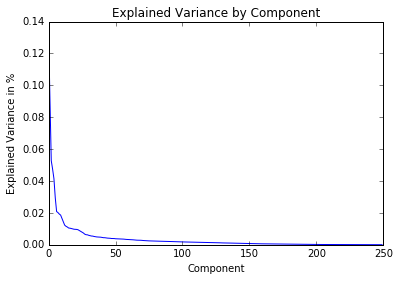

In [14]:
#Identify Number of components to model
ex_var=pca_estimator.explained_variance_ratio_[:250]
ex_var_all=pd.DataFrame(pca_estimator.explained_variance_ratio_)
ex_var_all.to_csv("ex_var_all.csv")
plt.plot(ex_var)
plt.xlabel('Component')
plt.ylabel('Explained Variance in %')
plt.title('Explained Variance by Component')
plt.legend(loc='best')

************************************************************
          Classification using Cross Validation
************************************************************

In [15]:
#pca training and test sets
x_traincv_pca, x_testcv_pca, y_traincv_pca, y_testcv_pca = cross_validation.train_test_split(x_train_pca, 
                                                                             y_train, test_size=0.4, random_state=0)

In [16]:
#scaled feature training and test sets
x_traincv, x_testcv, y_traincv, y_testcv = cross_validation.train_test_split(x_train, 
                                                                             y_train, test_size=0.4, random_state=0)


****************************************************************************
                         Classification Models
****************************************************************************


**************************************
eXtreme Gradient Boosting
**************************************

In [ ]:
#Determine appropriate number of components using default parameters
#xgb
#subsample [default=1]
#subsample ratio of the training instance. Setting it to 0.5 means that XGBoost randomly collected 
#half of the data instances to grow trees and this will prevent overfitting.

for i in range(len(x_traincv_pca[0])):
    i=150+i
    #xgb parameters
    params = {'objective':'binary:logistic','eval_metric' : 'auc',}#'eta': 0.2 ,'max_depth':12 }
    
    #train input matrix
    xgb_train_data = xgb.DMatrix(x_traincv_pca[:,0:i], y_traincv_pca)
    xgb_test_data  = xgb.DMatrix(x_testcv_pca[:,0:i])

    xgb_estimator = xgb.train(params, xgb_train_data)#, num_boost_round= 400)

    train_pred=xgb_estimator.predict(xgb_train_data)
    test_pred =xgb_estimator.predict(xgb_test_data)

    xgb_train_auc=roc_auc_score(y_traincv_pca, train_pred)
    xgb_test_auc =roc_auc_score(y_testcv_pca, test_pred)

    print(str(i) + 'components:  ' +'xgb train set auc-> ' + str(xgb_train_auc) + ' ///  ' + 'xgb test set auc-> ' + str(xgb_test_auc))


Output:

#150components:  xgb train set auc-> 0.888928338955 ///  xgb test set auc-> 0.878314956541
#151components:  xgb train set auc-> 0.88892860142 ///  xgb test set auc-> 0.878315499766
#152components:  xgb train set auc-> 0.888308300474 ///  xgb test set auc-> 0.878000635528
#153components:  xgb train set auc-> 0.888308300474 ///  xgb test set auc-> 0.878000635528
#154components:  xgb train set auc-> 0.891606581989 ///  xgb test set auc-> 0.880798590684
#155components:  xgb train set auc-> 0.893195143367 ///  xgb test set auc-> 0.883562943132
#156components:  xgb train set auc-> 0.893195143367 ///  xgb test set auc-> 0.883562943132
#157components:  xgb train set auc-> 0.893199116934 ///  xgb test set auc-> 0.883562977536
#158components:  xgb train set auc-> 0.893219039732 ///  xgb test set auc-> 0.883573743356
#159components:  xgb train set auc-> 0.902566525502 ///  xgb test set auc-> 0.894667616541
#160components:  xgb train set auc-> 0.906920194652 ///  xgb test set auc-> 0.899459815088
#161components:  xgb train set auc-> 0.906920194652 ///  xgb test set auc-> 0.899459815088
#162components:  xgb train set auc-> 0.908241134781 ///  xgb test set auc-> 0.900161135528
#163components:  xgb train set auc-> 0.913513480759 ///  xgb test set auc-> 0.905538143556
#164components:  xgb train set auc-> 0.912668827195 ///  xgb test set auc-> 0.904856064156
#165components:  xgb train set auc-> 0.912668827195 ///  xgb test set auc-> 0.904856064156
#166components:  xgb train set auc-> 0.912646930147 ///  xgb test set auc-> 0.904763331073
#167components:  xgb train set auc-> 0.913624087574 ///  xgb test set auc-> 0.90556145969
#168components:  xgb train set auc-> 0.913661700609 ///  xgb test set auc-> 0.905572937739
#169components:  xgb train set auc-> 0.913164071148 ///  xgb test set auc-> 0.905469938905
#170components:  xgb train set auc-> 0.913547115133 ///  xgb test set auc-> 0.90628238181
#171components:  xgb train set auc-> 0.913547115133 ///  xgb test set auc-> 0.90628238181
#172components:  xgb train set auc-> 0.913395592488 ///  xgb test set auc-> 0.905644482621
#173components:  xgb train set auc-> 0.913395592488 ///  xgb test set auc-> 0.905644482621
#174components:  xgb train set auc-> 0.914835472758 ///  xgb test set auc-> 0.907612254644
#175components:  xgb train set auc-> 0.922553948878 ///  xgb test set auc-> 0.915979759201
#176components:  xgb train set auc-> 0.922553948878 ///  xgb test set auc-> 0.915979759201
#177components:  xgb train set auc-> 0.921227496317 ///  xgb test set auc-> 0.915647525334
#178components:  xgb train set auc-> 0.923018105895 ///  xgb test set auc-> 0.916376725906
#179components:  xgb train set auc-> 0.923018105895 ///  xgb test set auc-> 0.916376725906
#180components:  xgb train set auc-> 0.923027568302 ///  xgb test set auc-> 0.916381724484
#181components:  xgb train set auc-> 0.923044349564 ///  xgb test set auc-> 0.916355169519
#182components:  xgb train set auc-> 0.922395847052 ///  xgb test set auc-> 0.916230382222
#183components:  xgb train set auc-> 0.922395847052 ///  xgb test set auc-> 0.916230382222
#184components:  xgb train set auc-> 0.924980888927 ///  xgb test set auc-> 0.919112161566
#185components:  xgb train set auc-> 0.924980888927 ///  xgb test set auc-> 0.919112161566
#186components:  xgb train set auc-> 0.924982007552 ///  xgb test set auc-> 0.919116388463
#187components:  xgb train set auc-> 0.924982007552 ///  xgb test set auc-> 0.919116388463
#188components:  xgb train set auc-> 0.924982007552 ///  xgb test set auc-> 0.919116388463
#189components:  xgb train set auc-> 0.924982023906 ///  xgb test set auc-> 0.919115209664
#190components:  xgb train set auc-> 0.923794273292 ///  xgb test set auc-> 0.917814030291
#191components:  xgb train set auc-> 0.923794273292 ///  xgb test set auc-> 0.917814030291
#192components:  xgb train set auc-> 0.926545294557 ///  xgb test set auc-> 0.920636707329
#193components:  xgb train set auc-> 0.926554233777 ///  xgb test set auc-> 0.920605603758
#194components:  xgb train set auc-> 0.926554233777 ///  xgb test set auc-> 0.920605603758
#195components:  xgb train set auc-> 0.927471728173 ///  xgb test set auc-> 0.922175708618
#196components:  xgb train set auc-> 0.927471728173 ///  xgb test set auc-> 0.922175708618
#197components:  xgb train set auc-> 0.927471728173 ///  xgb test set auc-> 0.922175708618
#198components:  xgb train set auc-> 0.927471728173 ///  xgb test set auc-> 0.922175708618
#199components:  xgb train set auc-> 0.927461394859 ///  xgb test set auc-> 0.922067786654
#200components:  xgb train set auc-> 0.927461394859 ///  xgb test set auc-> 0.922067786654
#201components:  xgb train set auc-> 0.927437029998 ///  xgb test set auc-> 0.922000193132
#202components:  xgb train set auc-> 0.927437029998 ///  xgb test set auc-> 0.922000193132
#203components:  xgb train set auc-> 0.927594603276 ///  xgb test set auc-> 0.922115496622
#204components:  xgb train set auc-> 0.927671751453 ///  xgb test set auc-> 0.922418931702
#205components:  xgb train set auc-> 0.927671751453 ///  xgb test set auc-> 0.922418931702
#206components:  xgb train set auc-> 0.927671751453 ///  xgb test set auc-> 0.922418931702
#207components:  xgb train set auc-> 0.927671751453 ///  xgb test set auc-> 0.922418931702
#208components:  xgb train set auc-> 0.927671751453 ///  xgb test set auc-> 0.922418931702
#209components:  xgb train set auc-> 0.927671751453 ///  xgb test set auc-> 0.922418931702
#210components:  xgb train set auc-> 0.927671751453 ///  xgb test set auc-> 0.922418931702
#211components:  xgb train set auc-> 0.927671751453 ///  xgb test set auc-> 0.922418931702
#212components:  xgb train set auc-> 0.927702247777 ///  xgb test set auc-> 0.922473096695
#212components:  xgb train set auc-> 0.927702247777 ///  xgb test set auc-> 0.922473096695
#213components:  xgb train set auc-> 0.927702247777 ///  xgb test set auc-> 0.922473096695
#214components:  xgb train set auc-> 0.927702247777 ///  xgb test set auc-> 0.922473096695
#215components:  xgb train set auc-> 0.927702247777 ///  xgb test set auc-> 0.922473096695
#216components:  xgb train set auc-> 0.927702671232 ///  xgb test set auc-> 0.922470628642
#217components:  xgb train set auc-> 0.927702671232 ///  xgb test set auc-> 0.922470628642
#218components:  xgb train set auc-> 0.927702671232 ///  xgb test set auc-> 0.922470628642
#219components:  xgb train set auc-> 0.927701407969 ///  xgb test set auc-> 0.922435929222
#220components:  xgb train set auc-> 0.92779482508 ///  xgb test set auc-> 0.92244956146
#221components:  xgb train set auc-> 0.933046283922 ///  xgb test set auc-> 0.928567708642
#222components:  xgb train set auc-> 0.932434607989 ///  xgb test set auc-> 0.928096076226
#223components:  xgb train set auc-> 0.933422789208 ///  xgb test set auc-> 0.928798301437
#224components:  xgb train set auc-> 0.933995806938 ///  xgb test set auc-> 0.929929419005
#225components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#226components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#227components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#228components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#229components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#230components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#231components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#232components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#233components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#234components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#235components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#236components:  xgb train set auc-> 0.934006591589 ///  xgb test set auc-> 0.929915805175
#237components:  xgb train set auc-> 0.934006624162 ///  xgb test set auc-> 0.929915150589
#238components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#239components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#240components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#241components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#242components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#243components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#244components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#245components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#246components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#247components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#248components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#249components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#250components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#251components:  xgb train set auc-> 0.934041040837 ///  xgb test set auc-> 0.929868087663
#252components:  xgb train set auc-> 0.934041366036 ///  xgb test set auc-> 0.929868330002
#253components:  xgb train set auc-> 0.933736118348 ///  xgb test set auc-> 0.929022625111
#254components:  xgb train set auc-> 0.933365568386 ///  xgb test set auc-> 0.92952273913
#255components:  xgb train set auc-> 0.933365568386 ///  xgb test set auc-> 0.92952273913
#256components:  xgb train set auc-> 0.933365568386 ///  xgb test set auc-> 0.92952273913
#257components:  xgb train set auc-> 0.933365568386 ///  xgb test set auc-> 0.92952273913
#258components:  xgb train set auc-> 0.933365804712 ///  xgb test set auc-> 0.929522806732
#259components:  xgb train set auc-> 0.933365963156 ///  xgb test set auc-> 0.929523971045
#260components:  xgb train set auc-> 0.933394957479 ///  xgb test set auc-> 0.929547002891
#261components:  xgb train set auc-> 0.933394957479 ///  xgb test set auc-> 0.929547002891
#262components:  xgb train set auc-> 0.933394957479 ///  xgb test set auc-> 0.929547002891
#263components:  xgb train set auc-> 0.933394957479 ///  xgb test set auc-> 0.929547002891
#264components:  xgb train set auc-> 0.933392436047 ///  xgb test set auc-> 0.929613594464
#265components:  xgb train set auc-> 0.933363886627 ///  xgb test set auc-> 0.929690865846
#266components:  xgb train set auc-> 0.933363886627 ///  xgb test set auc-> 0.929690865846
#267components:  xgb train set auc-> 0.933363886627 ///  xgb test set auc-> 0.929690865846
#268components:  xgb train set auc-> 0.934281113866 ///  xgb test set auc-> 0.930146811123
#269components:  xgb train set auc-> 0.935126919166 ///  xgb test set auc-> 0.931138690091
#270components:  xgb train set auc-> 0.935210876013 ///  xgb test set auc-> 0.93123532323
#271components:  xgb train set auc-> 0.935210876013 ///  xgb test set auc-> 0.93123532323
#272components:  xgb train set auc-> 0.935210876013 ///  xgb test set auc-> 0.93123532323
#273components:  xgb train set auc-> 0.935210876013 ///  xgb test set auc-> 0.93123532323
#274components:  xgb train set auc-> 0.935160176465 ///  xgb test set auc-> 0.931145834711
#275components:  xgb train set auc-> 0.935160176465 ///  xgb test set auc-> 0.931145834711
#276components:  xgb train set auc-> 0.935160176465 ///  xgb test set auc-> 0.931145834711
#277components:  xgb train set auc-> 0.934360377848 ///  xgb test set auc-> 0.93020431665
#278components:  xgb train set auc-> 0.934360377848 ///  xgb test set auc-> 0.93020431665
#279components:  xgb train set auc-> 0.934360377848 ///  xgb test set auc-> 0.93020431665
#280components:  xgb train set auc-> 0.934360377848 ///  xgb test set auc-> 0.93020431665
#281components:  xgb train set auc-> 0.934357766202 ///  xgb test set auc-> 0.930216802985
#282components:  xgb train set auc-> 0.934357766202 ///  xgb test set auc-> 0.930216802985
#283components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#284components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#285components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#286components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#287components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#288components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#289components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#290components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#291components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#292components:  xgb train set auc-> 0.934360403049 ///  xgb test set auc-> 0.930215069191
#293components:  xgb train set auc-> 0.934356573314 ///  xgb test set auc-> 0.930201009917
#294components:  xgb train set auc-> 0.934357276125 ///  xgb test set auc-> 0.930201514815
#295components:  xgb train set auc-> 0.934050002309 ///  xgb test set auc-> 0.930190865789
#296components:  xgb train set auc-> 0.934050002309 ///  xgb test set auc-> 0.930190865789
#297components:  xgb train set auc-> 0.934050002309 ///  xgb test set auc-> 0.930190865789
#298components:  xgb train set auc-> 0.934050002309 ///  xgb test set auc-> 0.930190865789
#299components:  xgb train set auc-> 0.934050002309 ///  xgb test set auc-> 0.930190865789
#300components:  xgb train set auc-> 0.934050002309 ///  xgb test set auc-> 0.930190865789
#301components:  xgb train set auc-> 0.934050002309 ///  xgb test set auc-> 0.930190865789
#302components:  xgb train set auc-> 0.934051476295 ///  xgb test set auc-> 0.930190615603
#303components:  xgb train set auc-> 0.934248999054 ///  xgb test set auc-> 0.930209689148
#304components:  xgb train set auc-> 0.934248999054 ///  xgb test set auc-> 0.930209689148
#305components:  xgb train set auc-> 0.934248999054 ///  xgb test set auc-> 0.930209689148
#306components:  xgb train set auc-> 0.934248999054 ///  xgb test set auc-> 0.930209689148
#307components:  xgb train set auc-> 0.934248999054 ///  xgb test set auc-> 0.930209689148
#308components:  xgb train set auc-> 0.934175668815 ///  xgb test set auc-> 0.930163001651
#309components:  xgb train set auc-> 0.934175668815 ///  xgb test set auc-> 0.930163001651
#310components:  xgb train set auc-> 0.934175668815 ///  xgb test set auc-> 0.930163001651
#311components:  xgb train set auc-> 0.934175668815 ///  xgb test set auc-> 0.930163001651
#312components:  xgb train set auc-> 0.934175668815 ///  xgb test set auc-> 0.930163001651
#313components:  xgb train set auc-> 0.934175668815 ///  xgb test set auc-> 0.930163001651
#314components:  xgb train set auc-> 0.934175668815 ///  xgb test set auc-> 0.930163001651
#315components:  xgb train set auc-> 0.934175668815 ///  xgb test set auc-> 0.930163001651


In [ ]:
#grid search


def xgb_gridsearch(xt,yt):
    param_grid ={ 'gamma': [0.0,0.1,0.2],  
                 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]      ,    
                 'min_child_weight': [0,1,2,3],      
                 'max_delta_step': [0,1,2,3],          
                 'subsample': [0.5,0.6,0.7,0.8,0.9,1.0],                 
                 'colsample_bytree': [0.5,0.6,0.7,0.8,0.9,1.0],     
                }
    
    
    extreme=xgb.XGBClassifier()
      
    grid=GridSearchCV(estimator=extreme,param_grid=param_grid,scoring="roc_auc", n_jobs=-1, cv=3)  
    
    grid_train = grid.fit(xt,yt)

    print(grid.best_params_)

xgb_gridsearch(xt=x_train_pca,yt=y_train)
xgb_gridsearch(xt=x_traincv_pca,yt=y_traincv_pca)
xgb_gridsearch(xt=x_train_pca[:,0:225],yt=y_train)
xgb_gridsearch(xt=x_traincv_pca[:,0:225],yt=y_traincv_pca)


In [ ]:
#identify optimal parameters
subsample_list=[0.5,0.6,0.7,0.8,0.9,1.0]
max_depth_list= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
colsample_bytree_list= [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

def xg_paraml(label,x_train,y_train,x_test):

    for ss in subsample_list:
        for md in max_depth_list:
            for cb in colsample_bytree_list:
                xgb_train_data = xgb.DMatrix(x_train, np.array(y_train ))
                xgb_test_data=xgb.DMatrix(x_test)
                params={'objective':'binary:logistic','eval_metric' : 'auc',#'eta': 0.01 ,
                        'subsample':ss, 'max_depth':md, 'colsample_bytree':cb}
                xgb_estimator = xgb.train(params, xgb_train_data)#, num_boost_round= 800)
                pred=xgb_estimator.predict(xgb_train_data)
                pred_test=xgb_estimator.predict(xgb_test_data)
                roc_tr=roc_auc_score(y_train, pred)
                roc_te=roc_auc_score(y_testcv_pca, pred_test)
                print(label+ str(roc_tr) + '   '+str(roc_te) +' subsample '+str(ss)+' max_depth '+str(md)+' colsample '+str(cb))


xg_paraml(label=' cv ', x_train=x_traincv_pca[:,0:225],y_train=y_traincv_pca,x_test=x_testcv_pca[:,0:225])


output:

 #cv 0.966336648087   0.940667030261 subsample 1.0 max_depth 10 colsample 0.8
 #cv 0.984145057613   0.940416722613 subsample 1.0 max_depth 12 colsample 0.8
 #cv 0.966123416445   0.940113853694 subsample 1.0 max_depth 10 colsample 0.9
 #cv 0.963186506665   0.940041301129 subsample 0.9 max_depth 10 colsample 0.9


In [ ]:
#Perform Cross Validation using parameters
sub xg_cv_param(x_train,y_train,x_test,parameters):
    #xgb parameters
    params = parameters
    
    #train input matrix
    xgb_train_data = xgb.DMatrix(x_train, y_train)
    xgb_test_data  = xgb.DMatrix(x_test)

    xgb_estimator = xgb.train(params, xgb_train_data, num_boost_round= 800)

    train_pred=xgb_estimator.predict(xgb_train_data)
    test_pred =xgb_estimator.predict(xgb_test_data)

    xgb_train_auc=roc_auc_score(y_train, train_pred)
    xgb_test_auc =roc_auc_score(y_testcv, test_pred)

    print(xgb_train_auc)
    print(xgb_test_auc)

xg_cv_param(x_train=x_train_pca[:,0:225],y_train=y_train_pca,x_test=x_test_pca[:,0:225],
         parameters={'objective':'binary:logistic','eval_metric' : 'auc','eta': 0.01 ,
            "subsample" :[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
               "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
              "colsample_bytree" : [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              }
        ) 
xg_cv_param(x_train=x_train_pca[:,0:225],y_train=y_train_pca,x_test=x_test_pca[:,0:225],
         parameters={'objective':'binary:logistic','eval_metric' : 'auc','eta': 0.01 ,
            "subsample" :[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
               "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
              "colsample_bytree" : [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              }
        ) 

In [ ]:
#create submission files
#Perform Cross Validation using parameters
def xg_sub(label,x_train,y_train,x_test,parameters):
    #xgb parameters
    params = parameters
    
    #train input matrix
    xgb_train_data = xgb.DMatrix(x_train, y_train)
    xgb_test_data  = xgb.DMatrix(x_test)

    xgb_estimator = xgb.train(params, xgb_train_data, num_boost_round= 2001)

    train_pred=xgb_estimator.predict(xgb_train_data)
    test_pred =xgb_estimator.predict(xgb_test_data)

    xgb_train_auc=roc_auc_score(y_train, train_pred)

    print(xgb_train_auc)

    submission_xg = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
    submission_xg['QuoteNumber']          = test_df['QuoteNumber']
    submission_xg['QuoteConversion_Flag'] = test_pred
    submission_xg.to_csv('homesite_xg_' + label + '.csv', index=False)
    
    

In [ ]:
xg_sub(label=' 1 10 0.8 225 ', x_train=x_train_pca[:,0:225], y_train=y_train, x_test = x_test_pca[:,0:225],
         parameters={'objective':'binary:logistic','eval_metric' : 'auc','eta': 0.01 ,
            "subsample" :1.0,
               "max_depth": 10,
              "colsample_bytree" : 0.8,
              }
        ) 

In [ ]:
xg_sub(label=' 1 16 0.8 225 ', x_train=x_train_pca[:,0:225], y_train=y_train, x_test = x_test_pca[:,0:225],
         parameters={'objective':'binary:logistic','eval_metric' : 'auc','eta': 0.01 ,
            "subsample" :1.0,
               "max_depth": 16,
              "colsample_bytree" : 0.8,
              }
        ) 

In [ ]:
xg_sub(label=' 1 10 0.8 194 ', x_train=x_train_pca[:,0:194], y_train=y_train, x_test = x_test_pca[:,0:194],
         parameters={'objective':'binary:logistic','eval_metric' : 'auc','eta': 0.01 ,
            "subsample" :1.0,
               "max_depth": 10,
              "colsample_bytree" : 0.8,
              })

In [ ]:
xg_sub(label=' 1 10 0.8 269 ', x_train=x_train_pca[:,0:269], y_train=y_train, x_test = x_test_pca[:,0:269],
         parameters={'objective':'binary:logistic','eval_metric' : 'auc','eta': 0.01 ,
            "subsample" :1.0,
               "max_depth": 10,
              "colsample_bytree" : 0.8,
              })

In [ ]:
xg_sub(label=' 1 10 0.8 447 ', x_train=x_train_pca[:,0:447], y_train=y_train, x_test = x_test_pca[:,0:447],
         parameters={'objective':'binary:logistic','eval_metric' : 'auc','eta': 0.01 ,
            "subsample" :1.0,
               "max_depth": 10,
              "colsample_bytree" : 0.8,
              })

In [ ]:
xg_sub(label=' 1 10 0.8 175 ', x_train=x_train_pca[:,0:175], y_train=y_train, x_test = x_test_pca[:,0:175],
         parameters={'objective':'binary:logistic','eval_metric' : 'auc','eta': 0.01 ,
            "subsample" :1.0,
               "max_depth": 10,
              "colsample_bytree" : 0.8,
              })

In [ ]:
xg_sub(label=' 1 10 0.8 163 ', x_train=x_train_pca[:,0:163], y_train=y_train, x_test = x_test_pca[:,0:163],
         parameters={'objective':'binary:logistic','eval_metric' : 'auc','eta': 0.01 ,
            "subsample" :1.0,
               "max_depth": 10,
              "colsample_bytree" : 0.8,
              })

********************************************
Random Forest Classifier
********************************************

In [ ]:
#As a starting point, we will looks for a potential set of optimal parameters to train and test with

#function to 
def rf_params(xt,yt):
    param_grid ={ "criterion" :['gini','entropy'],
              "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
              "min_samples_split" : [1,2,3,4,5,6,7,8,9,10,11,12]      ,
             "min_samples_leaf": [1,2,3,4,5,6,7,8,9,10,11,12],
                 min_weight_fraction_leaf
            }

    rf=RandomForestClassifier()

    grid=RandomizedSearchCV(estimator=rf, param_distributions=param_grid,scoring="roc_auc", n_jobs=-1, cv=2,n_iter=40)

    grid_train = grid.fit(xt,yt)

    print(grid.best_params_)

rf_params(xt=x_train,yt=y_train)
rf_params(xt=x_traincv,yt=y_traincv)

output:

Full training parameters:
{'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 6}

Train/test parameters:
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 8, 'min_samples_split': 1}


In [ ]:
#random forecast for train and test sets
def rf(label,
       x_train,
       y_train,
       x_test,
       y_test,
       criterion,
       max_depth,
       min_samples_split,
       min_samples_leaf):

    my_rf_model = RandomForestClassifier(criterion=criterion,
                                         n_estimators=10,
                                         n_jobs=-1,
                                         #oob_score=True,
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf)
    my_rf_model_fit = my_rf_model.fit(x_train, y_train)

    y_pred_train = pd.DataFrame(my_rf_model_fit.predict_proba(x_train))
    y_pred_test  = pd.DataFrame(my_rf_model_fit.predict_proba(x_test))

    roc_train = roc_auc_score(y_train, y_pred_train[1])
    roc_test  = roc_auc_score(y_test, y_pred_test[1])
    
    print(label + ' train 1 '+ str(roc_train))
    print(label + ' test 1 ' + str(roc_test))

    #Predict and score train and test data, adjust parameters where train and test are consistent
rf(label='par_cv_params ',x_train=x_traincv,y_train=y_traincv,x_test=x_testcv,y_test=y_testcv,
   criterion='gini',max_depth=12,min_samples_split=6,min_samples_leaf=4)
rf(label='par_tr_params ',x_train=x_traincv,y_train=y_traincv,x_test=x_testcv,y_test=y_testcv,
   criterion='gini',max_depth=12,min_samples_split=1,min_samples_leaf=4)

par_cv_params  train 1 0.955112676199
par_cv_params  test 1 0.943520670536
par_tr_params  train 1 0.956989185373
par_tr_params  test 1 0.945370386727

In [ ]:
#random forecast for submission
def rf_sub(label,
       x_train,
       y_train,
       x_test,
       criterion,
       max_depth,
       min_samples_split,
       min_samples_leaf):

    my_rf_model = RandomForestClassifier(criterion=criterion,
                                         n_estimators=1000,
                                         n_jobs=-1,
                                         #oob_score=True,
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf)
    my_rf_model_fit = my_rf_model.fit(x_train, y_train)

    y_pred_train = pd.DataFrame(my_rf_model_fit.predict_proba(x_train))
    y_pred_test  = pd.DataFrame(my_rf_model_fit.predict_proba(x_test))

    roc_train = roc_auc_score(y_train, y_pred_train[1])
    
    submission_rf = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
    submission_rf['QuoteNumber']          = test_df['QuoteNumber']
    submission_rf['QuoteConversion_Flag'] = y_pred_test
    submission_rf.to_csv('homesite_rf_' + label + '.csv', index=False)

    print(roc_train)
    
#Once parameters are finalized, create a submission file
rf_sub(label='par_cv_1 sub ',x_train=x_train,y_train=y_train,x_test=x_test,
   criterion='gini',max_depth=12,min_samples_split=6,min_samples_leaf=4)
rf_sub(label='par_cv_2 sub ',x_train=x_train,y_train=y_train,x_test=x_test,
   criterion='gini',max_depth=12,min_samples_split=1,min_samples_leaf=4)

output:

0.95920886724
0.959039980251


****************************************************
                      EDA
****************************************************


In [ ]:
# How many columns....what are the data types....how many instances

homesite_df.info()
print("----------------------------")
test_df.info()

In [ ]:
# preview the data

pd.options.display.max_columns = 500 # view all columns
homesite_df.head()

In [ ]:
#  Basic Stats

bstats = homesite_df.describe(percentiles=[0.01,0.99], include='all')
bstats.to_csv("describe_train.csv")

In [ ]:
#pearson correlation coefficient
all_corr = homesite_df.loc[ : ,homesite_df.columns]

all_corr.to_csv("corr_field6_12.csv")


In [ ]:
# examine the correlations across the variables before we begin modeling
# when using linear models, what to look for potential multi-collinearity issues
#sales field
sales_field_df_vars = homesite_df.loc[ : ,['SalesField2B','SalesField2A','SalesField1B','SalesField1A','SalesField15',
                                           'SalesField14','SalesField13','SalesField12','SalesField11']]

axes=scatter_matrix(sales_field_df_vars,alpha=0.2, figsize=(24, 24), diagonal='hist')

corr = sales_field_df_vars.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center') 
    

In [ ]:
# examine the correlations across the variables before we begin modeling
# when using linear models, what to look for potential multi-collinearity issues
#coverage
coverage_df_vars = homesite_df.loc[ : ,['CoverageField6B','CoverageField6A','CoverageField4B','CoverageField4A',
                                        'CoverageField3B','CoverageField3A','CoverageField2B','CoverageField2A',
                                        'CoverageField1B','CoverageField1A','CoverageField11B','CoverageField11A',]]

axes=scatter_matrix(coverage_df_vars,alpha=0.2, figsize=(24, 24), diagonal='hist')

corr = coverage_df_vars.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [ ]:
#property Variable Scatterplot Matrix

property_df_vars_chart = homesite_df.loc[ : ,['PropertyField4','PropertyField39B','PropertyField39A','PropertyField3',
                                              'PropertyField26B','PropertyField26A','PropertyField24B','PropertyField24A',
                                              'PropertyField21B','PropertyField21A','PropertyField1B','PropertyField1A',
                                              'PropertyField16B','PropertyField16A',]]

axes=scatter_matrix(property_df_vars_chart,alpha=0.2, figsize=(24, 24), diagonal='hist')

corr = property_df_vars_chart.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [ ]:
#Coverage Variable Scatterplot Matrix

coverage_property_df_vars_chart = homesite_df.loc[ : ,['CoverageField1A','CoverageField1B','CoverageField2A','CoverageField2B',
                                              'CoverageField3A','CoverageField3B','CoverageField4A','CoverageField4B',
                                              'PropertyField21A','PropertyField21B','PropertyField24A','PropertyField24B']]

axes=scatter_matrix(coverage_property_df_vars_chart,alpha=0.2, figsize=(24, 24), diagonal='hist')
corr = coverage_property_df_vars_chart.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [ ]:
#Coverage Variable Scatterplot Matrix

field_geo_df_vars_chart = homesite_df.loc[ : ,['Field10','Field11','Field6','Field9','GeographicField11A',
                                                       'GeographicField11B','GeographicField12A','GeographicField12B',
                                                       'GeographicField13A','GeographicField13B','GeographicField14B',
                                                       'GeographicField15A','GeographicField15B','GeographicField16A',
                                                       'GeographicField16B','GeographicField17B','GeographicField20A',
                                                       'GeographicField20B','GeographicField23B','GeographicField64',
                                                       'GeographicField6A','GeographicField6B','GeographicField7A',
                                                       'GeographicField7B','GeographicField8A','GeographicField8B',
                                                       'GeographicField9A','GeographicField9B']]

axes=scatter_matrix(field_geo_df_vars_chart,alpha=0.2, figsize=(24, 24), diagonal='hist')
corr = field_geo_df_vars_chart.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [ ]:
# examine the correlations across the variables before we begin modeling
# when using linear models, what to look for potential multi-collinearity issues
#personal

Personal_df_vars = homesite_df.loc[ : ,['PersonalField84','PersonalField83','PersonalField82','PersonalField81',
                                          'PersonalField80','PersonalField79','PersonalField78','PersonalField77',
                                          'PersonalField76','PersonalField75','PersonalField74','PersonalField73',
                                          'PersonalField72','PersonalField71','PersonalField70','PersonalField69',
                                          'PersonalField68','PersonalField67','PersonalField66','PersonalField65',
                                          'PersonalField64','PersonalField63','PersonalField62','PersonalField61',
                                          'PersonalField60','PersonalField6','PersonalField59','PersonalField58',
                                          'PersonalField57','PersonalField56','PersonalField55','PersonalField54',
                                          'PersonalField53','PersonalField52','PersonalField51','PersonalField50',
                                          'PersonalField5','PersonalField4B','PersonalField4A','PersonalField49',
                                          'PersonalField48','PersonalField47','PersonalField46','PersonalField45',
                                          'PersonalField44','PersonalField43','PersonalField42','PersonalField41',
                                          'PersonalField40','PersonalField39','PersonalField38',
                                          'PersonalField37','PersonalField36','PersonalField35','PersonalField34',
                                          'PersonalField33','PersonalField32','PersonalField31',
                                          'PersonalField30','PersonalField29',
                                          'PersonalField28','PersonalField27','PersonalField26','PersonalField25',
                                          'PersonalField24','PersonalField23','PersonalField22','PersonalField2',
                                          'PersonalField15','PersonalField12','PersonalField10B','PersonalField10A',
                                          'PersonalField1']]

axes=scatter_matrix(Personal_df_vars,alpha=0.2, figsize=(24, 24), diagonal='hist')

corr = Personal_df_vars.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
